In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
# !pip install seaborn

Data Collection and Processing

In [6]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv("archive\gld_price_data.csv")

In [7]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
# print the last five rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
# number of rows and columns in a dataframe
gold_data.shape

(2290, 6)

In [10]:
# Getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# Checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
# Getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation between various columns in the data :

    1. Positive Correlation
    2. Negative Correlation

In [13]:
correlation = gold_data.corr()

C:\Users\Patil\AppData\Local\Temp\ipykernel_15848\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

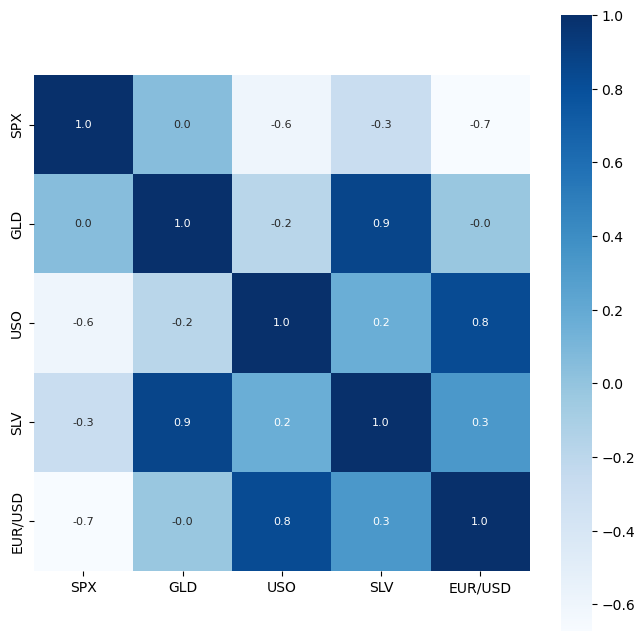

In [14]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, 
            cbar = True, 
            square = True, 
            fmt = '.1f',
            annot = True,
            annot_kws = {'size' : 8},
            cmap = 'Blues')

In [15]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


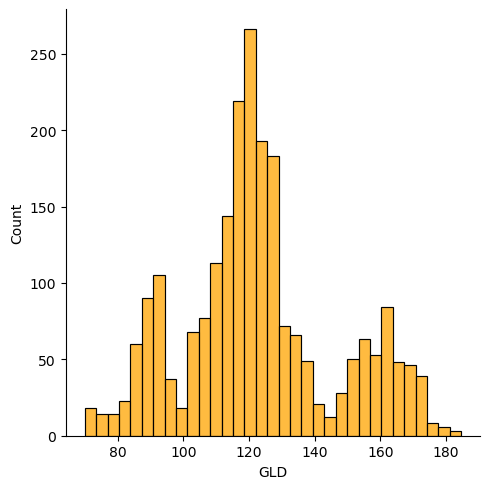

In [23]:
# Checking the distribution of the gold price
sns.displot(gold_data['GLD'], color = 'orange')

Splitting the features and Target

In [24]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [25]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [26]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test Data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

Model Training :
We will be using Random Forest Regressor to train our machine learning model.

In [29]:
regressor = RandomForestRegressor(n_estimators = 100)

In [30]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [31]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [32]:
print(test_data_prediction)

[168.56389942  82.07159964 115.90340004 127.51210101 120.61710121
 154.78409711 150.1676992  126.17229972 117.48099873 125.94480094
 116.68920103 172.03880066 141.82149875 167.77799806 115.28549984
 117.59280036 137.5603032  169.85410012 159.30870338 157.50409946
 155.10340021 125.13760004 176.36889962 157.04290285 125.11000043
  93.80809981  77.58250035 120.66770029 119.09299932 167.46999969
  88.25620043 125.38910012  90.93220055 117.71139998 121.13699971
 136.18810064 115.53510108 115.32080075 146.71989975 107.11680105
 104.2447025   87.20059783 126.61119992 117.8961998  153.55449858
 119.75690004 108.30619951 108.0223983   93.12170032 126.9524982
  74.88580027 113.73699916 121.3117997  111.29669922 119.13089897
 120.58799908 159.65669945 167.62520142 146.79069672  85.74479883
  94.06330045  86.75289893  90.23039985 119.00500078 126.38540061
 127.66519996 170.64559979 122.24059953 117.50819885  98.78329999
 168.26490044 143.03909886 132.36410259 121.28410196 121.34899904
 119.731400

In [33]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score) 

R squared error :  0.988977933074721


Compare the actual values and the predicted values in a plot

In [34]:
Y_test = list(Y_test)

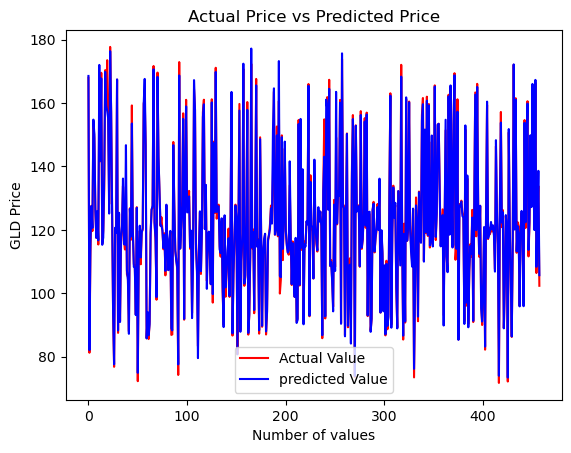

In [38]:
plt.plot(Y_test, color = 'red', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'blue', label = 'predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()